# Call-Plan Revenue Analysis (with Stastical Data Analysis)

## Project description

W are working as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

In this project, we are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: <br>

* who the clients are
* where they're from
* which plan they use
* the number of calls they made
* text messages they sent in 2018. 

We were ask to analyze clients' behaviour and determine which prepaid plan brings in more revenue.

<a id='top'></a>

### Table of content:

#### [1. Importing Libraries](#import) 
#### [2. Loading Data](#Data1) 
[2.1 Loading Datasets](#loading_dataset1)  
[2.2 Calls Dataset](#calls1)  
[2.3 Internet Dataset](#internet1)  
[2.4 Messages Dataset](#messages1)  
[2.5 Plans Dataset](#plans1)  
[2.6 Users Dataset](#users1)  
[2.7 Conclusion](#conclusion_dataset1)  
#### [3. Data preprocessing](#preprocessing1)
[3.1 Converting the dataypes](#convert_data1)  
[3.2 Combination of all Datasets](#merged_dataset1) <br>
[3.2.1 Preparation for calls dataset ](#prep_call_data1) <br>
[3.2.2 Preparation for internet dataset](#prep_internet_data1) <br>
[3.2.3 Preparation for messages dataset](#prep_messages_data1) <br>
[3.2.4 Merge dataset](#merging_sets1) <br>
[3.3 Fill missing values of the merged dataset](#fill_values1) <br>
[3.4 Change datatypes of the merged dataset](#change_data_types1) <br>
[3.5 Adding the monthly revenue per month](#add_month_revenue1) <br>
[3.6 Conclusion](#conclusion_prep_data1)
#### [4. Data Analysis](#Analysis1)
[4.1 Split to surf and ultimate plan](#split_plans1) <br> 
[4.2 Data volume usage by month...](#volume_data1) <br> 
[4.2.1 ...by duration](#by_duration1) <br> 
[4.2.2 ...by GB usage](#by_gb_usage1) <br> 
[4.2.3 ...by messages](#by_messages1) <br> 
[4.3 Histogram and Standard Deviation...](#hst_std1)  <br> 
[4.3.1 ...by duration](#by_duration11)<br> 
[4.3.2 ...by GB usage](#by_gb_usage11)<br> 
[4.3.3 ...by messages](#by_messages11)<br> 
[4.4 Conclusion](#concl_data1) <br>  
#### [5. Hypthese testing](#tHypo1)
[5.1 Test the hypotheses](#testing1)  <br>
[5.1.1 Average revenue from users of Surf and Ultimate calling plans differences](#average_rev_by_plans1) <br>
[5.1.2 Average revenue from users in NY-NJ area differs from users form other regions](#average_rev_by_regions1) <br>
[5.2 Conclusion](#conclusion_hypo1) <br>
#### [6. Final Conclusion](#final_concl)

---

<a id='import'></a>

### 1. Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats as st
from io import BytesIO
import requests

<a id='Data1'></a>
<a id='Data2'></a>

### 2. Loading Data

#### Quick Links:
[2.1 Loading Datasets](#loading_dataset2)  
[2.2 Calls Dataset](#calls2)  
[2.3 Internet Dataset](#internet2)  
[2.4 Messages Dataset](#messages2)  
[2.5 Plans Dataset](#plans2)  
[2.6 Users Dataset](#users2)  
[2.7 Conclusion](#conclusion_dataset2)  

<a id='loading_dataset1'></a>
<a id='loading_dataset2'></a>

#### 2.1 Loading Datasets

In [111]:
try:
    megaline_calls = pd.read_csv('megaline_calls.csv')
    megaline_internet = pd.read_csv('megaline_internet.csv')
    megaline_messages = pd.read_csv('megaline_messages.csv')
    megaline_plans = pd.read_csv('megaline_plans.csv')
    megaline_users = pd.read_csv('megaline_users.csv')
except:
    calls_spreadsheet_id = '10eT3MsKeM1HIWTsgKZuIzA2UGlrdeQXOoP0qhl3aG28'
    file_name1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(calls_spreadsheet_id)
    r1 = requests.get(file_name1)
    megaline_calls = pd.read_csv(BytesIO(r1.content))
    
    internet_spreadsheet_id = '1E7kwmbnx_6g76Qj4h74hFRXlfpOm4HIBQgIobsPvhpY'
    file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(internet_spreadsheet_id)
    r2 = requests.get(file_name2)
    megaline_internet = pd.read_csv(BytesIO(r2.content))
    
    messages_spreadsheet_id = '1aabWIsyuofEjWZpEsPPfs1iBifIiHmD8kmQnvFBuDl4'
    file_name3 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(messages_spreadsheet_id)
    r3 = requests.get(file_name3)
    megaline_messages = pd.read_csv(BytesIO(r3.content))
    
    plans_spreadsheet_id = '1jjklI_pMhnOv-ZfjMm7VMDMQr3Kw39oDxxBqGZGGgf8'
    file_name4 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(plans_spreadsheet_id)
    r4 = requests.get(file_name4)
    megaline_plans = pd.read_csv(BytesIO(r4.content))
    
    users_spreadsheet_id = '1YxcgdSBkS-O3Krl2aas_CjRnt9iEKAjOVQX0DbDjb-I'
    file_name5 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(users_spreadsheet_id)
    r5 = requests.get(file_name5)
    megaline_users = pd.read_csv(BytesIO(r5.content))


<a id='calls1'></a>
<a id='calls2'></a>

#### 2.2 Calls Dataset

In [124]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [125]:
megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [126]:
megaline_calls.sample()

,id,user_id,call_date,duration
22603,1082_692,1082,2018-06-07,20.08


In [127]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<a id='internet1'></a>
<a id='internet2'></a>

#### 2.3 Internet Dataset

In [128]:
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [129]:
megaline_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [130]:
megaline_internet.sample()

,id,user_id,session_date,mb_used
2306,1011_46,1011,2018-11-27,746.64


In [131]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<a id='messages1'></a>
<a id='messages2'></a>

#### 2.4 Messages Dataset

In [132]:
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [133]:
megaline_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [134]:
megaline_messages.sample()

,id,user_id,message_date
43283,1285_124,1285,2018-10-16


In [135]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<a id='plans1'></a>
<a id='plans2'></a>

#### 2.5 Plans Dataset

In [136]:
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [137]:
megaline_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [138]:
megaline_plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [139]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<a id='users1'></a>
<a id='users2'></a>

#### 2.6 Users Dataset

In [140]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [141]:
megaline_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [142]:
megaline_users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30


In [143]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<a id='conclusion_dataset1'></a>
<a id='conclusion_dataset2'></a>

#### 2.7 Conclusion

The first dataset contains the calls made, which contains about 137000 entries, including the metrics: <br> 
* `id` 
* `user_id`
* `call_date`
* `duration in minutes`  

The lowest duration is 0. Thus could be indicator for missing calls. <br>
However, the highest duration is about 38 minutes. <br>

So far, nothing unusual here.


The second dataset includes the data about the internet usage. Talking of the content, we got: <br>
* `id`
* `user_id` 
* `session_date` 
* `traffic caused in MegaByte` 

While the lowest usage is 0 MB which basically means the client haven´t caused any (mobile) traffic, the highest amount is 1693 MB or 1.693 GB.

As above, nothing unusual. Zero usage may appear when a user only uses wifi connection. Many local places free wifi connection nowerdays. So nothing to concern about.

The message dataset holds:
* `id`
* `user_id`
* `the date when messages were sent`

This is a typical exmaple of metadata.


The plans dataset stores the information about the two products:
* `surf`
* `ultimate`


Last but not least, the user dataset includes all important data about the client:
* `name`
* `age`
* `city` 
* `date of registration` 
* `which plan is in use`
* `churn date` 

Here we can find missing values in the churn date but that only means that the client hasn't churn.

[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

------

<a id='preprocessing1'></a>
<a id='preprocessing2'></a>

### 3. Data preprocessing

#### Quick Links:
[3.1 Converting to datetime](#convert_data2)  
[3.2 Combination of all Datasets](#merged_dataset2) <br>
[3.2.1 Preparation for calls dataset ](#prep_call_data2) <br>
[3.2.2 Preparation for internet dataset](#prep_internet_data2) <br>
[3.2.3 Preparation for messages dataset](#prep_messages_data2) <br>
[3.2.4 Merge dataset](#merging_sets2) <br>
[3.3 Fill missing values of the merged dataset](#fill_values2) <br>
[3.4 Change datatypes of the merged dataset](#change_data_types2) <br>
[3.5 Adding the monthly revenue per month](#add_month_revenue2) <br>
[3.6 Conclusion](#conclusion_prep_data2) <br>

<a id='convert_data1'></a>
<a id='convert_data2'></a>

#### 3.1 Converting the datetime

In [144]:
date_format = '%Y-%m-%d'

megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format = date_format)
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format = date_format)
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format = date_format)
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format = date_format)
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format = date_format)

<a id='merged_dataset1'></a>
<a id='merged_dataset2'></a>

#### 3.2 Combination of all Datasets

<a id='prep_call_data1'></a>
<a id='prep_call_data2'></a>

#### 3.2.1 Preparation for calls dataset

In [145]:
megaline_calls['month'] = pd.DatetimeIndex(megaline_calls['call_date']).month

megaline_calls['duration'] = megaline_calls['duration'].apply(np.ceil).astype('int')

clients_calls_grouped = megaline_calls.groupby(['user_id', 'month']).sum()
clients_calls_grouped = clients_calls_grouped.reset_index()

clients_calls_grouped.head()

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


<a id='prep_internet_data1'></a>
<a id='prep_internet_data2'></a>

#### 3.2.2 Preparation for internet dataset

In [146]:
megaline_internet['month'] = pd.DatetimeIndex(megaline_internet['session_date']).month

clients_internet_grouped = megaline_internet.groupby(['user_id', 'month']).sum()
clients_internet_grouped = clients_internet_grouped.reset_index()

clients_internet_grouped['gb_used'] = np.ceil(clients_internet_grouped['mb_used']/1024)
clients_internet_grouped.drop(columns='mb_used', inplace=True)

clients_internet_grouped.head()

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


<a id='prep_messages_data1'></a>
<a id='prep_messages_data2'></a>

#### 3.2.3 Preparation for messages dataset

In [147]:
megaline_messages['month'] = pd.DatetimeIndex(megaline_messages['message_date']).month

clients_messages_grouped = megaline_messages.groupby(['user_id', 'month']).count()
                          
clients_messages_grouped.drop(columns = 'message_date', inplace=True)
clients_messages_grouped.rename(columns = {'id':'messages'}, inplace=True)
clients_messages_grouped = clients_messages_grouped.reset_index()

clients_messages_grouped.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


<a id='merging_sets1'></a>
<a id='merging_sets2'></a>

#### 3.2.4 Merge dataset

In [148]:
clients_information = megaline_users[{'user_id','plan','age','reg_date','churn_date','city'}]

data_frames = [clients_calls_grouped, clients_internet_grouped, clients_messages_grouped]
data_user = reduce(lambda left, right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)

data_user = data_user.merge(clients_information, on ='user_id', how='outer')

data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2303 non-null   int64         
 1   month       2293 non-null   float64       
 2   duration    2258 non-null   float64       
 3   gb_used     2277 non-null   float64       
 4   messages    1806 non-null   float64       
 5   plan        2303 non-null   object        
 6   reg_date    2303 non-null   datetime64[ns]
 7   city        2303 non-null   object        
 8   churn_date  160 non-null    datetime64[ns]
 9   age         2303 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 197.9+ KB


<a id='fill_values1'></a>
<a id='fill_values2'></a>

#### 3.3. Fill missing values of the merged dataset

In [149]:
data_user.dropna(subset = ['month'], inplace = True)
data_user['churn_date'].fillna('active', inplace=True)
data_user.fillna(0, inplace=True)

data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2293 non-null   int64         
 1   month       2293 non-null   float64       
 2   duration    2293 non-null   float64       
 3   gb_used     2293 non-null   float64       
 4   messages    2293 non-null   float64       
 5   plan        2293 non-null   object        
 6   reg_date    2293 non-null   datetime64[ns]
 7   city        2293 non-null   object        
 8   churn_date  2293 non-null   object        
 9   age         2293 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 197.1+ KB


<a id='change_data_types1'></a>
<a id='change_data_types2'></a>

#### 3.4 Change datatypes of the merged dataset

In [150]:
data_user['month'] = data_user['month'].astype('int')
data_user['duration'] = data_user['duration'].astype('int')
data_user['messages'] = data_user['messages'].astype('int')
data_user['gb_used'] = data_user['gb_used'].astype('int')

data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2293 non-null   int64         
 1   month       2293 non-null   int64         
 2   duration    2293 non-null   int64         
 3   gb_used     2293 non-null   int64         
 4   messages    2293 non-null   int64         
 5   plan        2293 non-null   object        
 6   reg_date    2293 non-null   datetime64[ns]
 7   city        2293 non-null   object        
 8   churn_date  2293 non-null   object        
 9   age         2293 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 197.1+ KB


<a id='add_month_revenue1'></a>
<a id='add_month_revenue2'></a>

#### 3.5 Adding monthly revenue per month

In [151]:
def monthly_revenue(row):
    minutes = row['duration']
    gb = row['gb_used']
    messages = row['messages']
    plan = row['plan']
    
    fix_charge = 0
    extra_minutes = 0
    extra_gb = 0
    extra_messages = 0
    
    if plan == 'surf':
        fix_charge = 20
        if minutes > 500:
            extra_minutes = (minutes - 500) * 0.03
        if gb > 15:
            extra_gb = (gb - 15) * 10
        if messages > 50:
            extra_messages = (messages - 50) * 0.03
    elif plan == 'ultimate':
        fix_charge = 70
        if minutes > 3000:
            extra_minutes = (minutes - 3000) * 0.01
        if gb > 30:
            extra_gb = (gb - 30) * 7
        if messages > 1000:
            extra_messages = (messages - 1000) * 0.01
            
    return fix_charge + extra_minutes + extra_gb + extra_messages

In [152]:
data_user['revenue'] = data_user.apply(monthly_revenue, axis = 1)
data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2293 non-null   int64         
 1   month       2293 non-null   int64         
 2   duration    2293 non-null   int64         
 3   gb_used     2293 non-null   int64         
 4   messages    2293 non-null   int64         
 5   plan        2293 non-null   object        
 6   reg_date    2293 non-null   datetime64[ns]
 7   city        2293 non-null   object        
 8   churn_date  2293 non-null   object        
 9   age         2293 non-null   int64         
 10  revenue     2293 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 215.0+ KB


<a id='conclusion_prep_data1'></a>
<a id='conclusion_prep_data2'></a>

#### 3.6 Conclusion

With the beginning of the preprocessing, we needed to change the formats of dates (hereby as string, means those are object format) into datetime format for our further steps.

Following up to merge all the tables into one, we need to prepare the single ones first. To do so, we added 
a new column `month` to the following datasets:

* **megaline_calls**
* **megaline_internet**
* **megaline_messages**

In addition, the columns `age`, `city` , `churn_date` and `plan reg_date` were extracted for adding to our new dataset later on.

Now we had merged every table to one, we checked missing values. We identifyed NaN values in the
`churn_date`, `duration`, `gb_used` , `messages` and `month` column.



| **NaN Column** | **possible reason** | **approach** |
| ----------- | ----------- |----------- |
| churn_date | Missing value could be an indicator that the user is an active customer | change NaN to active (string) |
| duration | can occur, as it means the customer has no calltime. Looks reasonable  | change NaN to 0 |
| gb_used | can occur, as it means the customer has no data traffic consumed. Looks reasonable | change NaN to 0 |
| messages | Could mean the customer has not send any messages, which can be reasonable, concidering the downfall of sms| change NaN to 0 |
| month | could be the result of an system failure, however, happens only 10 times | delete columns with missing values |


After handling the missing values, we need to adjust the datatypes again. This time from floating to integer for:
`duration`, `gb_used` and `messages`. 

Finishing of our preprocessing, we still needed to calcualte and add a revenue column to our table, now the missing values were distinguished. To do so, we wrote a function to calculate the MRR (monthly recorring revenue).

[Back to top](#top) | [Back to Chapterstart: Data preprocessing](#preprocessing2)

---

<a id='Analysis1'></a>
<a id='Analysis2'></a>

### 4. Data Analysis

#### Quick Links:
[4.1 Split to surf and ultimate plan](#split_plans2) <br> 
[4.2 Data volume usage by month...](#volume_data2) <br> 
[4.2.1 ...by duration](#by_duration2) <br> 
[4.2.2 ...by GB usage](#by_gb_usage2) <br> 
[4.2.3 ...by messages](#by_messages2) <br> 
[4.3 Histogram and Standard Deviation...](#hst_std2)  <br> 
[4.3.1 ...by duration](#by_duration22)<br> 
[4.3.2 ...by GB usage](#by_gb_usage22)<br> 
[4.3.3 ...by messages](#by_messages22)<br> 
[4.4 Conclusion](#concl_data2) <br> 

<a id='split_plans1'></a>
<a id='split_plans2'></a>

#### 4.1 Split to surf and ultimate plan

In [153]:
data_plan_surf = data_user[data_user['plan'] == 'surf']
data_plan_ultimate = data_user[data_user['plan'] == 'ultimate']

<a id='volume_data1'></a>
<a id='volume_data2'></a>

#### 4.2 Data Volume usage by month...

In [154]:
print('Customers using plan surf:', len(data_plan_surf.groupby('user_id')))
print('Customers using plan ultimate:', len(data_plan_ultimate.groupby('user_id')))
print()
print('Average revenue plan surf: {:.2f}'.format(data_plan_surf['revenue'].mean()))
print('Average revenue plan ultimate: {:.2f}'.format(data_plan_ultimate['revenue'].mean()))

Customers using plan surf: 333
Customers using plan ultimate: 157

Average revenue plan surf: 60.71
Average revenue plan ultimate: 72.31


In [168]:
def monthly_volume(item, data_plan_surf=data_plan_surf, data_plan_ultimate=data_plan_ultimate):
    
    volume_surf = data_plan_surf.groupby('month')[item].mean().rename('surf')
    volume_ultimate = data_plan_ultimate.groupby('month')[item].mean().rename('ultimate')
    volume_plot = pd.concat([volume_surf,volume_ultimate], axis = 1)
    
    ax = volume_plot.plot(kind='bar', color = ['skyblue', 'slategrey'], title = item)
    
    if item == 'duration':
        ax.set_ylabel('{} in minutes'.format(item))
    elif item == 'gb_used':
        ax.set_ylabel('GB usage')
    else:
        ax.set_ylabel('n {} sent'.format(item))
    
    
    print('Volume surf by: {}'.format(item))
    print(volume_surf.head(15).round(2))
    print()
    print('Plan ultimate by: {}'.format(item))
    print(volume_ultimate.head(15).round(2))

<a id='by_duration1'></a>
<a id='by_duration2'></a>

#### 4.2.1 ...by duration

Volume surf by: duration
month
1     203.00
2     297.00
3     330.00
4     351.54
5     399.58
6     431.30
7     449.98
8     410.11
9     414.23
10    429.73
11    423.33
12    473.84
Name: surf, dtype: float64

Plan ultimate by: duration
month
1     193.50
2     403.14
3     304.25
4     336.86
5     406.24
6     370.96
7     427.07
8     421.44
9     437.51
10    450.74
11    445.20
12    459.10
Name: ultimate, dtype: float64


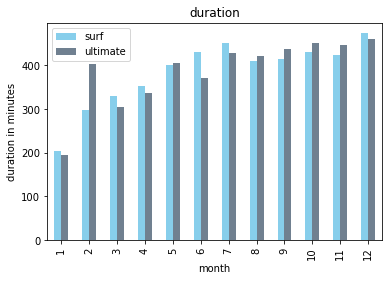

In [166]:
monthly_volume('duration')

Both plans have in common a nearly progressiv growth, with small differences in their respective fluctuation. While their decrease within their progression differentiated in the month, those month are regardless in summer. This could mean, that the majority of the respective user group are on vacation and thus, are visting foreign contries where roaming fees may apply, which the users tryed to avoid.

Another interesting insight is the relation between january and december consumption, as its in the end of the year twice as in the beginning.

<a id='by_gb_usage1'></a>
<a id='by_gb_usage2'></a>

#### 4.2.2 ...by GB usage

Volume surf by: gb_used
month
1      5.00
2     12.22
3     13.57
4     12.22
5     14.12
6     15.48
7     16.88
8     16.88
9     16.69
10    17.41
11    16.43
12    18.24
Name: surf, dtype: float64

Plan ultimate by: gb_used
month
1      7.25
2     17.29
3     18.42
4     16.33
5     16.86
6     15.43
7     16.49
8     17.85
9     17.01
10    17.72
11    17.12
12    18.40
Name: ultimate, dtype: float64


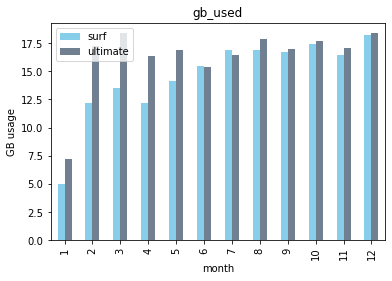

In [169]:
monthly_volume('gb_used')

It's clear to see that the traffic usage in GB from ultimate plan are on alomost every month above 15 GB. This seems to be a lot compared to the surf plan. However, the ultimate plan offers a data volumen twice as much as the surf plan. We will take this info for our chapter conclusion.

<a id='by_messages1'></a>
<a id='by_messages2'></a>

#### 4.2.3 ...by messages

Volume surf by: messages
month
1     10.50
2     12.00
3     15.26
4     17.40
5     24.01
6     25.30
7     27.03
8     28.78
9     30.76
10    33.84
11    32.39
12    38.60
Name: surf, dtype: float64

Plan ultimate by: messages
month
1     15.50
2     21.57
3     20.25
4     22.05
5     32.10
6     29.34
7     32.83
8     38.48
9     37.90
10    39.44
11    38.61
12    45.01
Name: ultimate, dtype: float64


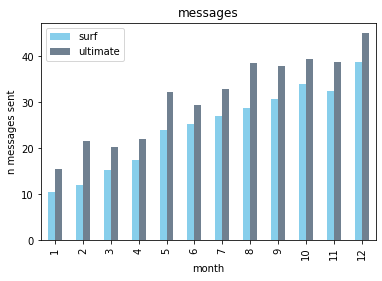

In [170]:
monthly_volume('messages')

On average, there is an progressive growth on each plans. We could assume that New Years Eve is doing December a favour for being the peak of this chart. Another interessting point is on ultimates plan:
Every time, at the years quarter, a small drop (compared to the sent messages from the previos month) occurs.
Again, we'll take this conclusion to our chapter conclusion.

<a id='hst_std1'></a>
<a id='hst_std2'></a>

#### 4.3 Histogram and Standard Deviation...

In [159]:
def hist_and_std(item, data_plan_surf=data_plan_surf, data_plan_ultimate=data_plan_ultimate):
    
    # plotting   
    plt.hist(data_plan_surf[item], color = 'skyblue', density = True, alpha = 0.7)
    plt.hist(data_plan_ultimate[item], color = 'slategrey', density = True, alpha = 0.7)
    plt.title(item)
    plt.xlabel('volume used')
    plt.ylabel('density')
    plt.legend(['surf', 'ultimate'])
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    print('Plan surf:')
    print('Mean: {:.2f}'.format(data_plan_surf[item].mean()))
    print('Standard deviation: {:.2f}'.format(data_plan_surf[item].std()))
    print()
    print('Plan ultimate:')
    print('Mean: {:.2f}'.format(data_plan_ultimate[item].mean()))
    print('Standard deviation: {:.2f}'.format(data_plan_ultimate[item].std()))

<a id='by_duration11'></a>
<a id='by_duration22'></a>

#### 4.3.1 ...by duration

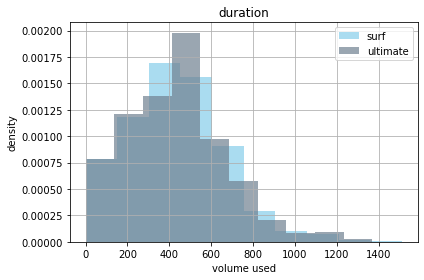

Plan surf:
Mean: 428.75
Standard deviation: 234.45

Plan ultimate:
Mean: 430.45
Standard deviation: 240.51


In [160]:
hist_and_std('duration')

The standard deviation on both sides is nearly the same. Both histograms are skewed to the left, since the majority of the users with a call duration (volume used) between zero value to the mean value. Afterwards, the amount of users decreases significantly.

<a id='by_gb_usage11'></a>
<a id='by_gb_usage22'></a>

#### 4.3.2 ...by GB usage

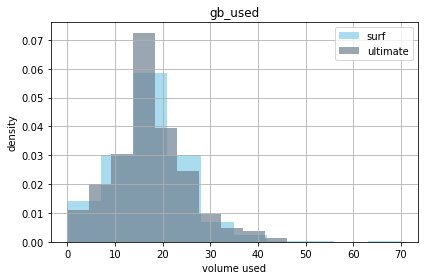

Plan surf:
Mean: 16.67
Standard deviation: 7.85

Plan ultimate:
Mean: 17.31
Standard deviation: 7.67


In [161]:
hist_and_std('gb_used')

The distribution of the gb_used histograms are both normal distributed with a standard deviation of 7.85 by surf plan and 7.67 by ultimate plan. This is the reason why the dipsertion has a high peak and falls significantly before and after the mean.

<a id='by_messages11'></a>
<a id='by_messages22'></a>

#### 4.3.3 ...by messages

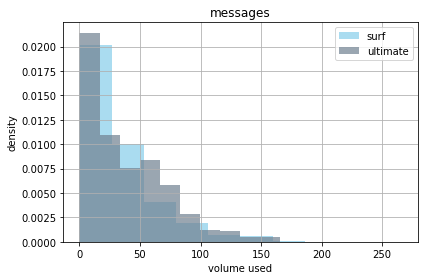

Plan surf:
Mean: 31.16
Standard deviation: 33.57

Plan ultimate:
Mean: 37.55
Standard deviation: 34.77


In [162]:
hist_and_std('messages')

The messages data is skewed to the right, which means that there is a huge amount of customers which use messages rarely or not at all. It seems that the customer don´t need the messages and propably use online message services. 

<a id='concl_data1'></a>
<a id='concl_data2'></a>

#### 4.4 Conclusion

As teased before, we'll take our gained insights at this point for the chapter conclusion.

It's clear to see that the traffic usage in GB from ultimate plan are on alomost every month above 15 GB. Taking the full download volume of 30 GB from that plan in concideration, the product owner should re-think the ultimate package and recudes the offered volume by 20-30% and offering the remaining volume as add-on packages.

If we take a look to the ultimate plan users we can see that they are using slightly more volume than the surf users in all 3 areas. But the increase of the volume is very low when we compare their used volume with the max volume they could have used by that plan. 

Overall, they use about 15% of the included minutes, 58% of the included gb and only 4% of the included messages. In fact that they are paying 70 $ for their plan, they are paying way more than they are actually using. Summarized, the company sells more then they have to provide, hence the company benefits a lot more from the low usage of the ultimate plan users than the surf users. 

[Back to top](#top) | [Back to Chapterstart: Data Analysis](#Analysis2)

---

<a id='Hypo1'></a>
<a id='Hypo2'></a>

### 5. Hypothese testing

#### Quick Links:
[5.1 Test the hypotheses](#testing2)  <br>
[5.1.1 Average revenue from users of Surf and Ultimate calling plans differences](#average_rev_by_plans2) <br>
[5.1.2 Average revenue from users in NY-NJ area differs from users form other regions](#average_rev_by_regions2) <br>
[5.2 Conclusion](#conclusion_hypo2) <br>

<a id='testing1'></a>
<a id='testing2'></a>

#### 5.1 Test the hypotheses

<a id='average_rev_by_plans1'></a>
<a id='average_rev_by_plans2'></a>

#### 5.1.1 The average revenue from users of Ultimate and Surf calling plans differs

In [163]:
revenue_surf = data_plan_surf.pivot_table(index='user_id', values='revenue')['revenue']
revenue_ultimate = data_plan_ultimate.pivot_table(index='user_id', values='revenue')['revenue']

print('Variance revenue surf: ', revenue_surf.var())
print('Variance revenue ultimate: ', revenue_ultimate.var())


alpha = 0.05

results = st.ttest_ind(revenue_surf,revenue_ultimate, equal_var = False)
print('p-value: ',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can´t reject the null hypothesis')

Variance revenue surf:  1897.9116226478002
Variance revenue ultimate:  55.12714659851139
p-value:  5.719435130362411e-08
We reject the null hypothesis


<a id='average_rev_by_regions1'></a>
<a id='average_rev_by_regions2'></a>

#### 5.1.2 Average revenue from users in NY-NJ area differs from that of the users from other regions

In [164]:
revenue_NY_NJ = data_user[data_user['city'].str.contains('NY-NJ')].groupby('user_id')['revenue'].mean()
revenue_other = data_user[~(data_user['city'].str.contains('NY-NJ'))].groupby('user_id')['revenue'].mean()

print('Variance revenue surf: ', revenue_NY_NJ.var())
print('Variance revenue ultimate: ', revenue_other.var())

alpha = 0.05

results = st.ttest_ind(revenue_NY_NJ,revenue_other, equal_var = False)
print('p-value: ',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can´t reject the null hypothesis')

Variance revenue surf:  1072.0487248450029
Variance revenue ultimate:  1400.5684341454555
p-value:  0.44104821081481804
We can´t reject the null hypothesis


<a id='conclusion_hypo1'></a>
<a id='conclusion_hypo2'></a>

#### 5.2 Conclusion

We tested two hypotheses to get an answer to the question:

* does the average revenue of the two plan differs?
* does the average revenue from users in NY-NJ area is different from that of the user from other regions?  
  
For the first test we extracted the revenue of the two plans in two variables and used them in the function `st.ttest_ind` to get the `p.value`. The `p.value` is 5.719435130362408e-08, so pretty low and lower then our alpha variable 0.05. That means that the probabilty is very small that there is no difference between the two revenues caused by variance, hence we can reject the null hypothesis and confirm the alternative hypothesis that the revenue of ultimate and surf plan differs. 

For the second test we filtered the region from the data_user dataset using the `str.contains()` method and divided between the revenue by user of NY-NJ area and other areas. Then we used the `st.ttest_ind()` again to get the 
`p-value`. In this case the `p-value` is 0.44104821081481804 so way higher than our alpha of 0.05. This result in the fact that we can´t reject the null hypothesis, as the difference of the regions revenue could be caused by variance. Therefore we cannot confirm that the average revenue from users in NY-NJ area differs from that of the users from other regions. 

[Back to top](#top) | [Back to Chapterstart: Hypthesis testing](#Hypo2)

---

<a id='final_concl'></a>

### 6. Final Conclusion

We analyzed the data and tested two hypotheses. Within those, we learned about the customer usage behaivior setup some kind of customer profiling. The company's cash cow is the ultimate plan, even if less than half of the customer, compared to the surf-plan user, are using it. 


| **Product** | **User Base** | **Average monthly revenue** |
| ----------- | ----------- |----------- |
| surf | 333 | 60.71 USD |
| ultimate | 157  | 72.31 USD |



Ultimate Plan's advantege is the ridiculous amount of provided resources to the customer, with the result, that roughly 20-30% of that offer aren't used at all. Assuming those unused resources aren't stocked on the customers account, it is pretty obvious that those 20-30% unused offers are wasted revenue potential.

That fact of wasted revenue potential comes even more clearly when looking at the number of user from the surf plan as well as their respective usage behaivior. On average, they are a bit above their plan, but instead of selling up, their tend to stick to their surf plan. This leads to a user base twice as much as the ultimate plan.


By taking all those facts into concideration, I would recomment Megaline to offer an hybrid model in between surf and ultimate plan. Thus, those surf plan user above their plan could be offered a 3 month trial phase for the hybrid model in order to convert them to a higher plan, applying the principals of product-led-growth.


[Back to top](#top) 